## Установка библиотек

In [71]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [3]:
data = pd.read_csv('data/streaming_viewership_data.csv')

In [4]:
data.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     6214 non-null   object 
 1   Session_ID                  6214 non-null   object 
 2   Device_ID                   6214 non-null   int64  
 3   Video_ID                    6214 non-null   int64  
 4   Duration_Watched (minutes)  6214 non-null   float64
 5   Genre                       6214 non-null   object 
 6   Country                     6214 non-null   object 
 7   Age                         6214 non-null   int64  
 8   Gender                      6214 non-null   object 
 9   Subscription_Status         6214 non-null   object 
 10  Ratings                     6214 non-null   int64  
 11  Languages                   6214 non-null   object 
 12  Device_Type                 6214 non-null   object 
 13  Location                    6214 

## Пункт 1

Разделим данные на мужчин и женщин

In [12]:
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

#### Проверим равенство медиан для времени просмотра видео (непрерывное)

In [16]:
male_df['Duration_Watched (minutes)'].median()

61.055089124999995

In [17]:
female_df['Duration_Watched (minutes)'].median()

60.42511731

In [19]:
alpha = 0.05

_, p = st.mannwhitneyu(male_df['Duration_Watched (minutes)'], female_df['Duration_Watched (minutes)'])

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")


Не можем отвергнуть H0


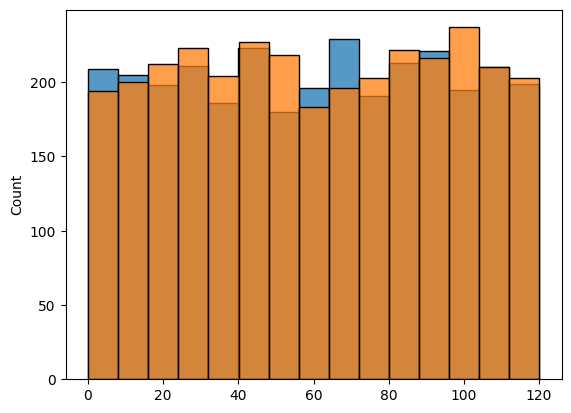

In [23]:
sns.histplot(male_df['Duration_Watched (minutes)'].values, fill=True)
sns.histplot(female_df['Duration_Watched (minutes)'].values, fill=True);

## Пункт 2
#### Проверим равенство распределений

In [92]:
_, p = st.ks_2samp(male_df['Duration_Watched (minutes)'], female_df['Duration_Watched (minutes)'])

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")

p


Не можем отвергнуть H0


0.9839426548054078

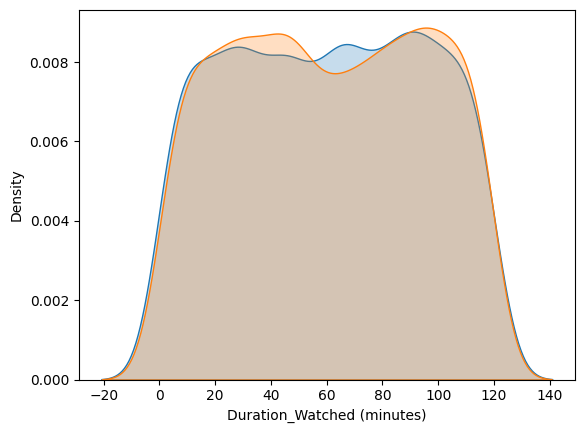

In [26]:
sns.kdeplot(male_df['Duration_Watched (minutes)'], fill=True)
sns.kdeplot(female_df['Duration_Watched (minutes)'], fill=True);

## Пункт 3
#### Проверим равенство медиан для качества просмотра видео (дискретное)

In [32]:
male_pq = np.array(male_df['Playback_Quality'].value_counts())
female_pq = np.array(female_df['Playback_Quality'].value_counts())

In [33]:
male_pq, female_pq

(array([1045, 1019, 1002]), array([1054, 1047, 1047]))

In [34]:
_, p = st.mannwhitneyu(male_pq, female_pq)

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")


Не можем отвергнуть H0


In [36]:
p

0.07652250047505922

## Пункт 4
#### Теперь посмотрим на равенство распределений

In [56]:
p = st.chi2_contingency([male_pq, female_pq])[1]

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")

p


Не можем отвергнуть H0


0.8502975924064989

#### Проверка релевантными тестами

In [62]:
_, p = st.kruskal(male_df['Duration_Watched (minutes)'], female_df['Duration_Watched (minutes)'])

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")


Не можем отвергнуть H0


В данном случае взяли критерий Краскела — Уоллиса, как альтернатива U-теста

In [68]:
p = st.median_test(male_df['Duration_Watched (minutes)'], female_df['Duration_Watched (minutes)'])[1]

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")


Не можем отвергнуть H0


В данном случае взяли критерий Муда, как альтернатива теста Колмогорова-Смирнова, так как в нем проходит сравнение равенства медиан

In [69]:
p = st.median_test(male_pq,female_pq)[1]

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")


Не можем отвергнуть H0


In [70]:
p = st.mannwhitneyu(male_pq,female_pq)[1]

if p > alpha:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")


Не можем отвергнуть H0


## Пункт 5

100%|██████████| 10000/10000 [00:21<00:00, 467.77it/s]


0.0551


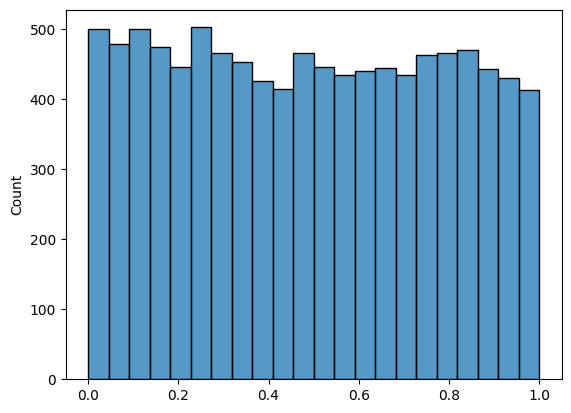

In [100]:
pvals = []
for _ in tqdm(range(10000)):
    a = np.random.choice(male_df['Duration_Watched (minutes)'], 1000)
    b = np.random.choice(female_df['Duration_Watched (minutes)'], 1000)
    pvals.append(st.mannwhitneyu(a,b).pvalue)
print((np.array(pvals) < 0.05).mean())

sns.histplot(pvals);

В данном случае бустрап предпочтительнее, так как мы не знаем дисперсии наших выборок, и на единичном тесте тест может дать ошибку. 

100%|██████████| 10000/10000 [00:06<00:00, 1444.50it/s]


0.0727


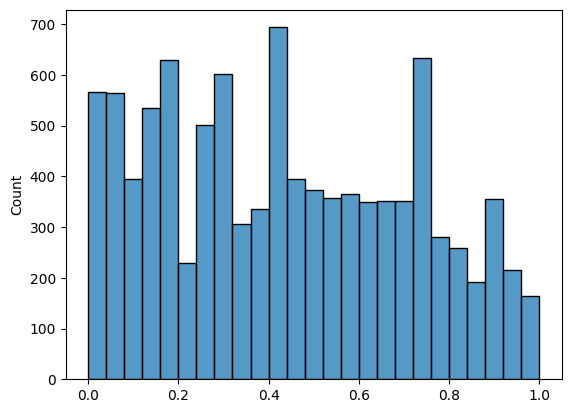

In [98]:
pvals = []
for _ in tqdm(range(10000)):
    a = np.random.choice(male_df['Duration_Watched (minutes)'], 1000)
    b = np.random.choice(female_df['Duration_Watched (minutes)'], 1000)
    pvals.append(st.ks_2samp(a,b).pvalue)
print((np.array(pvals) < 0.05).mean())

sns.histplot(pvals);

Равнозначно применение двух методов 

In [96]:
pvals = []

for _ in tqdm(range(10000)):
    a = np.random.choice(male_pq, 3)
    b = np.random.choice(female_pq, 3)
    pvals.append(st.mannwhitneyu(a,b).pvalue)
    
print((np.array(pvals) < 0.05).mean())

100%|██████████| 10000/10000 [00:09<00:00, 1017.57it/s]

0.0367


In [97]:
pvals = []

for _ in tqdm(range(10000)):
    a = np.random.choice(male_pq, 3)
    b = np.random.choice(female_pq, 3)
    pvals.append(st.chi2_contingency(a,b).pvalue)
    
print((np.array(pvals) < 0.05).mean())

100%|██████████| 10000/10000 [00:00<00:00, 12866.89it/s]

0.0


Для дискретного распределения подход бустрепа мощнее, так как он позволяет отойти  от малого количества данных